# Graph Theory for Graph Neural Networks

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

## Undirected Graph

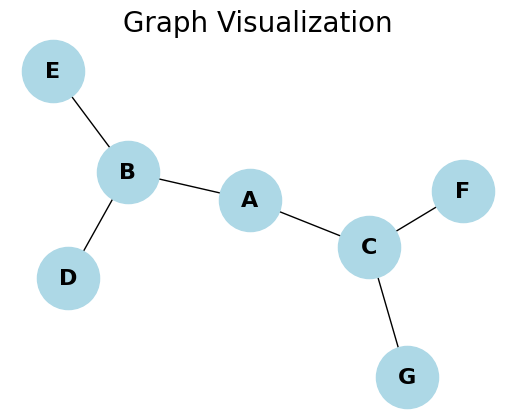

In [21]:
G = nx.Graph()
G.add_edges_from([('A', 'B'),
                 ('A', 'C'),
                 ('B', 'D'),
                 ('B', 'E'),
                 ('C', 'F'),
                 ('C', 'G')])
plt.axis('off')
plt.title('Graph Visualization', fontsize=20)
nx.draw(G, with_labels=True, node_color='lightblue', node_size=2000, font_size=16, font_weight='bold')

## Directed Graph

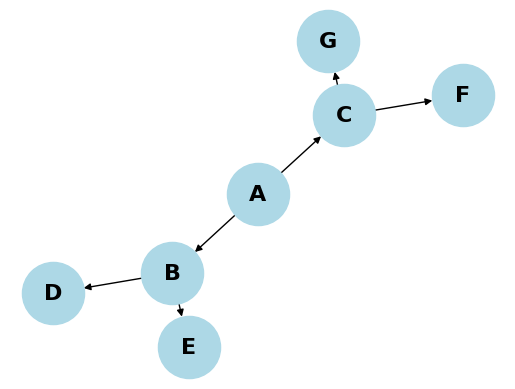

In [ ]:
DG = nx.DiGraph()
DG.add_edges_from([('A', 'B'),
                 ('A', 'C'),
                 ('B', 'D'),
                 ('B', 'E'),
                 ('C', 'F'),
                 ('C', 'G')])
plt.axis('off')
nx.draw(DG, with_labels=True,
        pos=nx.spring_layout(G, seed=0),
         node_color='lightblue', node_size=2000, font_size=16, font_weight='bold')

## Weighted Graph

{('A', 'B'): Text(-0.17062897224300366, -0.2578513560983575, '1'),
 ('A', 'C'): Text(0.1690871167597765, 0.25843018611299007, '2'),
 ('B', 'D'): Text(-0.5751300482618783, -0.5819109500526888, '3'),
 ('B', 'E'): Text(-0.30708797484122186, -0.7577037926506119, '4'),
 ('C', 'F'): Text(0.5743062636738074, 0.5815239970648829, '5'),
 ('C', 'G'): Text(0.3081456694549718, 0.7582993720664115, '6')}

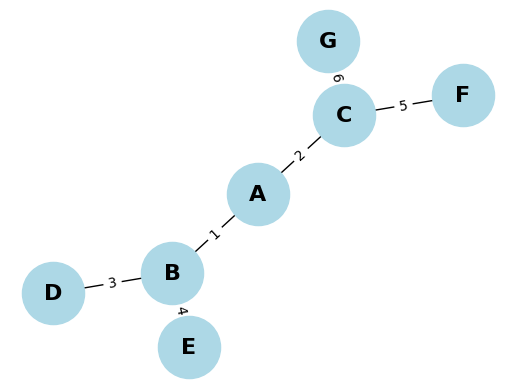

In [23]:
WG = nx.Graph()
WG.add_edges_from([('A', 'B', {'weight': 1}),
                    ('A', 'C', {'weight': 2}),
                    ('B', 'D', {'weight': 3}),
                    ('B', 'E', {'weight': 4}),
                    ('C', 'F', {'weight': 5}),
                    ('C', 'G', {'weight': 6})])
labels = nx.get_edge_attributes(WG, "weight")

plt.axis('off')
nx.draw(WG, with_labels=True,
        pos=nx.spring_layout(G, seed=0),
         node_color='lightblue', node_size=2000, font_size=16, font_weight='bold')
nx.draw_networkx_edge_labels(WG, pos=nx.spring_layout(G, seed=0), edge_labels=labels)


## Weighted Directed Graph

{('A', 'B'): Text(-0.17062897224300366, -0.2578513560983575, '1'),
 ('A', 'C'): Text(0.1690871167597765, 0.25843018611299007, '2'),
 ('B', 'D'): Text(-0.5751300482618783, -0.5819109500526888, '3'),
 ('B', 'E'): Text(-0.30708797484122186, -0.7577037926506119, '4'),
 ('C', 'F'): Text(0.5743062636738074, 0.5815239970648829, '5'),
 ('C', 'G'): Text(0.3081456694549718, 0.7582993720664115, '6')}

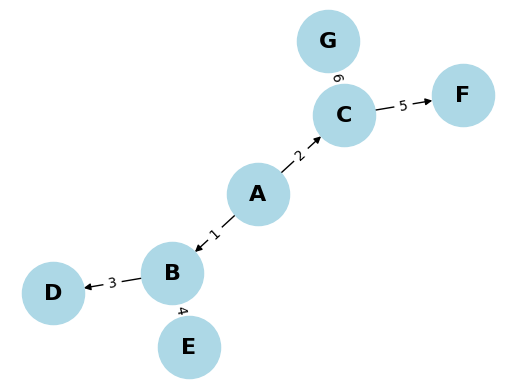

In [24]:
WDG = nx.DiGraph()
WDG.add_edges_from([('A', 'B', {'weight': 1}),
                    ('A', 'C', {'weight': 2}),
                    ('B', 'D', {'weight': 3}),
                    ('B', 'E', {'weight': 4}),
                    ('C', 'F', {'weight': 5}),
                    ('C', 'G', {'weight': 6})])
labels = nx.get_edge_attributes(WDG, "weight")

plt.axis('off')
nx.draw(WDG, with_labels=True,
        pos=nx.spring_layout(G, seed=0),
         node_color='lightblue', node_size=2000, font_size=16, font_weight='bold')
nx.draw_networkx_edge_labels(WDG, pos=nx.spring_layout(G, seed=0), edge_labels=labels)


Is G1 connected? True


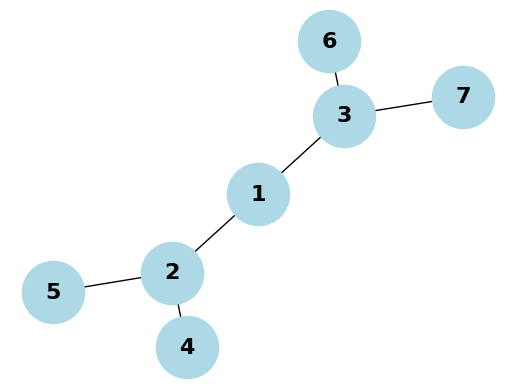

In [27]:
G1 = nx.Graph()
G1.add_edges_from([(1, 2),
                   (1, 3),
                   (2, 4),
                   (2, 5),
                   (3, 6),
                   (3, 7)])

plt.axis('off')
nx.draw(G1, with_labels=True,
        
         node_color='lightblue', node_size=2000, font_size=16, font_weight='bold')
print(f'Is G1 connected? {nx.is_connected(G1)}')

Is G2 connected? False


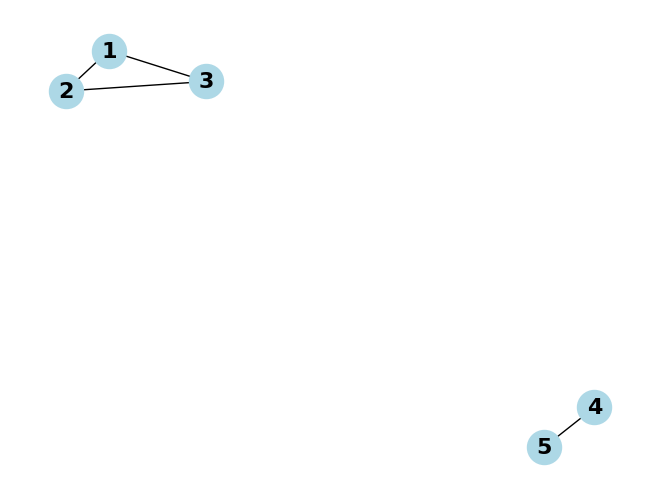

In [30]:
G2 = nx.Graph()
G2.add_edges_from([(1, 2),
                   (2, 3),
                   (3, 1),
                   (4, 5)])
# plt.axis('off')
nx.draw(G2, with_labels=True,
        
         node_color='lightblue', node_size=600, font_size=16, font_weight='bold')
print(f'Is G2 connected? {nx.is_connected(G2)}')

## Bipartite Graph

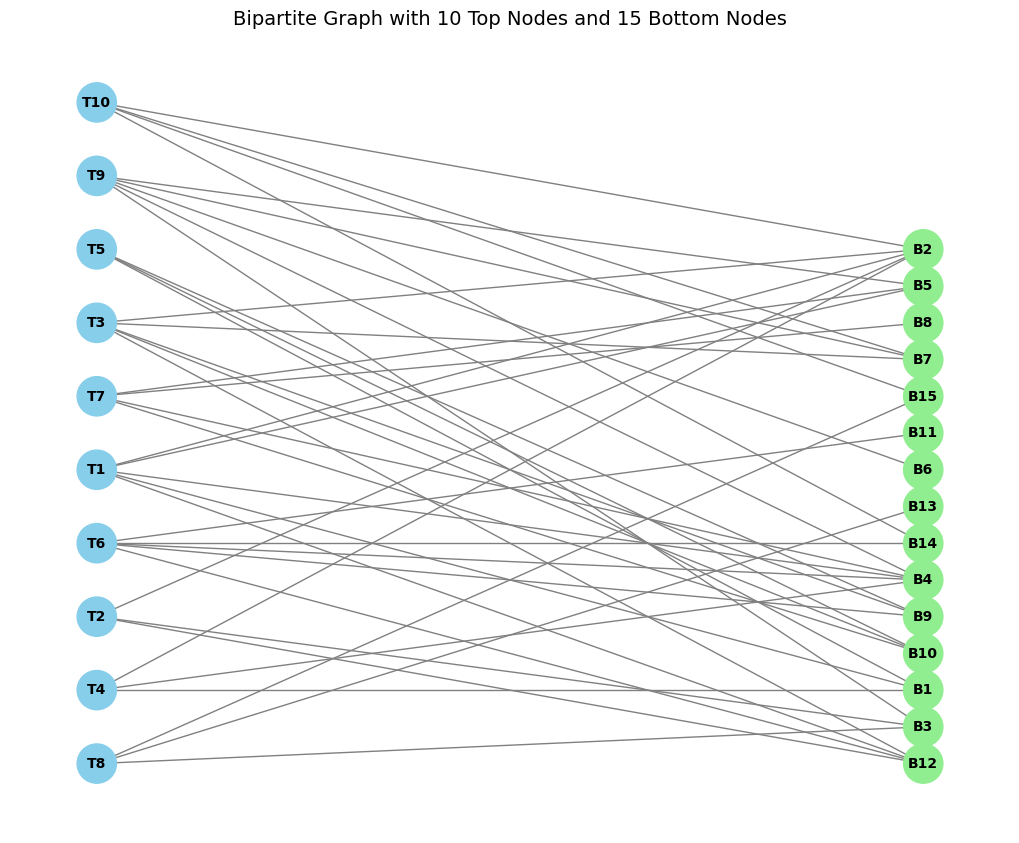

In [ ]:

B = nx.Graph()

# Define two sets of nodes (larger sets)
top_nodes = [f"T{i}" for i in range(1, 11)]  # 10 nodes in the top partition
bottom_nodes = [f"B{j}" for j in range(1, 16)]  # 15 nodes in the bottom partition

# Add nodes with the "bipartite" attribute
B.add_nodes_from(top_nodes, bipartite=0)  # Partition 0 (top)
B.add_nodes_from(bottom_nodes, bipartite=1)  # Partition 1 (bottom)


# Each top node connects to 3-5 random bottom nodes
for top_node in top_nodes:
    num_connections = random.randint(3, 5)
    connected_bottom = random.sample(bottom_nodes, num_connections)
    B.add_edges_from([(top_node, b) for b in connected_bottom])

# Separate nodes by group
top = {n for n, d in B.nodes(data=True) if d['bipartite'] == 0}
bottom = set(B.nodes()) - top

# Position nodes in two columns
pos = {}
pos.update((n, (1, i * 2)) for i, n in enumerate(top))  # Left column (x=1)
pos.update((n, (2, i)) for i, n in enumerate(bottom))  # Right column (x=2)

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(
    B,
    pos=pos,
    with_labels=True,
    node_size=800,
    node_color=['skyblue' if n in top else 'lightgreen' for n in B.nodes()],
    font_size=10,
    font_weight='bold',
    edge_color='gray'
)

plt.title("Bipartite Graph with 10 Top Nodes and 15 Bottom Nodes", fontsize=14)
plt.show()

## Degree of a Node

### Degree of Undirected Graph

Degree of node A: 2
Degree of node B: 3
Degree of node C: 3
Degree of node D: 1
Degree of node E: 1
Degree of node F: 1
Degree of node G: 1


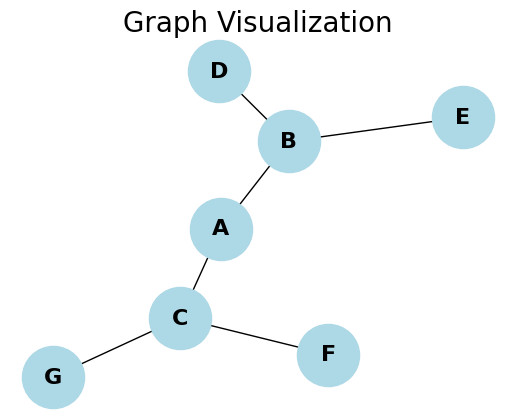

In [33]:
G = nx.Graph()
G.add_edges_from([('A', 'B'),
                 ('A', 'C'),
                 ('B', 'D'),
                 ('B', 'E'),
                 ('C', 'F'),
                 ('C', 'G')])
plt.axis('off')
plt.title('Graph Visualization', fontsize=20)
nx.draw(G, with_labels=True, node_color='lightblue', node_size=2000, font_size=16, font_weight='bold')
print(f'Degree of node A: {G.degree("A")}')
print(f'Degree of node B: {G.degree("B")}')
print(f'Degree of node C: {G.degree("C")}')
print(f'Degree of node D: {G.degree("D")}')
print(f'Degree of node E: {G.degree("E")}')
print(f'Degree of node F: {G.degree("F")}')
print(f'Degree of node G: {G.degree("G")}')

### Degree of Directed Graph

In Degree of node A: 0
In Degree of node B: 1
In Degree of node C: 1
In Degree of node D: 1
In Degree of node E: 1
In Degree of node F: 1
In Degree of node G: 1
Out Degree of node A: 2
Out Degree of node B: 2
Out Degree of node C: 2
Out Degree of node D: 0
Out Degree of node E: 0
Out Degree of node F: 0
Out Degree of node G: 0


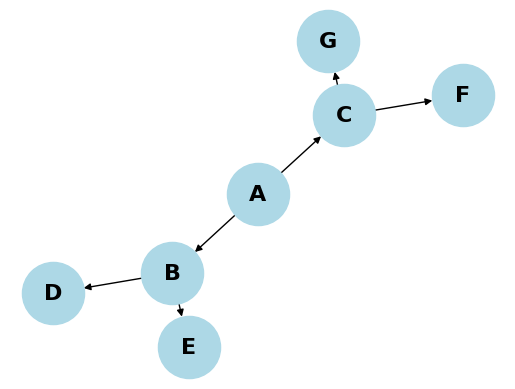

In [35]:
DG = nx.DiGraph()
DG.add_edges_from([('A', 'B'),
                 ('A', 'C'),
                 ('B', 'D'),
                 ('B', 'E'),
                 ('C', 'F'),
                 ('C', 'G')])
plt.axis('off')
nx.draw(DG, with_labels=True,
        pos=nx.spring_layout(G, seed=0),
         node_color='lightblue', node_size=2000, font_size=16, font_weight='bold')
print(f'In Degree of node A: {DG.in_degree("A")}')
print(f'In Degree of node B: {DG.in_degree("B")}')
print(f'In Degree of node C: {DG.in_degree("C")}')
print(f'In Degree of node D: {DG.in_degree("D")}')
print(f'In Degree of node E: {DG.in_degree("E")}')
print(f'In Degree of node F: {DG.in_degree("F")}')
print(f'In Degree of node G: {DG.in_degree("G")}')
print(f'Out Degree of node A: {DG.out_degree("A")}')
print(f'Out Degree of node B: {DG.out_degree("B")}')
print(f'Out Degree of node C: {DG.out_degree("C")}')
print(f'Out Degree of node D: {DG.out_degree("D")}')
print(f'Out Degree of node E: {DG.out_degree("E")}')
print(f'Out Degree of node F: {DG.out_degree("F")}')
print(f'Out Degree of node G: {DG.out_degree("G")}')

## Graph Measures

In [42]:
print(f"Degree centrality of Undirected Graph  = {nx.degree_centrality(G)}")
print(f"Closeness centrality  of Undirected Graph   = {nx.closeness_centrality(G)}")
print(f"Betweenness centrality of Undirected Graph   = {nx.betweenness_centrality(G)}")

Degree centrality of Undirected Graph  = {'A': 0.3333333333333333, 'B': 0.5, 'C': 0.5, 'D': 0.16666666666666666, 'E': 0.16666666666666666, 'F': 0.16666666666666666, 'G': 0.16666666666666666}
Closeness centrality  of Undirected Graph   = {'A': 0.6, 'B': 0.5454545454545454, 'C': 0.5454545454545454, 'D': 0.375, 'E': 0.375, 'F': 0.375, 'G': 0.375}
Betweenness centrality of Undirected Graph   = {'A': 0.6, 'B': 0.6, 'C': 0.6, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0}


In [44]:
print(f"Degree centrality of Directed Graph  = {nx.degree_centrality(DG)}")
print(f"Closeness centrality  of Directed Graph   = {nx.closeness_centrality(DG)}")
print(f"Betweenness centrality of Directed Graph   = {nx.betweenness_centrality(DG)}")

Degree centrality of Directed Graph  = {'A': 0.3333333333333333, 'B': 0.5, 'C': 0.5, 'D': 0.16666666666666666, 'E': 0.16666666666666666, 'F': 0.16666666666666666, 'G': 0.16666666666666666}
Closeness centrality  of Directed Graph   = {'A': 0.0, 'B': 0.16666666666666666, 'C': 0.16666666666666666, 'D': 0.2222222222222222, 'E': 0.2222222222222222, 'F': 0.2222222222222222, 'G': 0.2222222222222222}
Betweenness centrality of Directed Graph   = {'A': 0.0, 'B': 0.06666666666666667, 'C': 0.06666666666666667, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0}


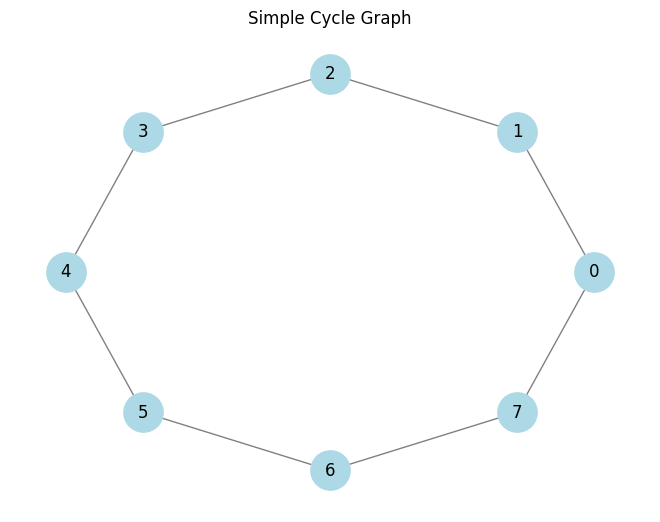

Degree centrality of Cyclic Graph  = {0: 0.2857142857142857, 1: 0.2857142857142857, 2: 0.2857142857142857, 3: 0.2857142857142857, 4: 0.2857142857142857, 5: 0.2857142857142857, 6: 0.2857142857142857, 7: 0.2857142857142857}
Closeness centrality  of Cyclic Graph   = {0: 0.4375, 1: 0.4375, 2: 0.4375, 3: 0.4375, 4: 0.4375, 5: 0.4375, 6: 0.4375, 7: 0.4375}
Betweenness centrality of Cyclic Graph   = {0: 0.21428571428571427, 1: 0.21428571428571427, 2: 0.21428571428571427, 3: 0.21428571428571427, 4: 0.21428571428571427, 5: 0.21428571428571427, 6: 0.21428571428571427, 7: 0.21428571428571427}


In [43]:
CG = nx.cycle_graph(8)

# Draw the graph
pos = nx.circular_layout(CG)
nx.draw(CG, pos, with_labels=True, node_color='lightblue', node_size=800, edge_color='gray')
plt.title("Simple Cycle Graph")
plt.show()
print(f"Degree centrality of Cyclic Graph  = {nx.degree_centrality(CG)}")
print(f"Closeness centrality  of Cyclic Graph   = {nx.closeness_centrality(CG)}")
print(f"Betweenness centrality of Cyclic Graph   = {nx.betweenness_centrality(CG)}")

## Adjacency Graph

In [50]:
G = nx.Graph()
G.add_edges_from([('A', 'B'),
                 ('A', 'C'),
                 ('B', 'D'),
                 ('B', 'E'),
                 ('C', 'F'),
                 ('C', 'G')])
adjacency_matrix = nx.adjacency_matrix(G)
edge_list = list(G.edges())
print("Edge List:", edge_list)
print("Adjacency Matrix:",adjacency_matrix.todense())
                 

Edge List: [('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')]
Adjacency Matrix: [[0 1 1 0 0 0 0]
 [1 0 0 1 1 0 0]
 [1 0 0 0 0 1 1]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]]
